In [2]:
import mne
import seaborn as sns
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
matplotlib.rcParams['svg.fonttype'] = 'none'
matplotlib.rcParams['font.family'] = 'Arial'

%matplotlib inline

train_clr = 'blue'
train_cmap = "Blues"

dev_clr = 'red'
dev_cmap = "OrRd"

test_clr = 'green'
test_cmap = "YlGn"

In [4]:
train = mne.read_epochs('../Decoding_Pos/len_matched_epochs_train_minica-epo.fif', preload=False)
dev = mne.read_epochs('../Decoding_PoS/len_matched_epochs_dev_minica-epo.fif', preload=False)
test = mne.read_epochs('../Decoding_PoS/len_matched_epochs_test_minica-epo.fif', preload=False)

Reading ../Decoding_Pos/len_matched_epochs_train_minica-epo.fif ...
    Read a total of 1 projection items:
        Average EEG reference (1 x 64) active
    Found the data of interest:
        t =       0.00 ...     700.00 ms
        0 CTF compensation matrices available
Reading ../Decoding_Pos\len_matched_epochs_train_minica-epo-1.fif ...
    Read a total of 1 projection items:
        Average EEG reference (1 x 64) active
    Found the data of interest:
        t =       0.00 ...     700.00 ms
        0 CTF compensation matrices available
Reading ../Decoding_Pos\len_matched_epochs_train_minica-epo-2.fif ...
    Read a total of 1 projection items:
        Average EEG reference (1 x 64) active
    Found the data of interest:
        t =       0.00 ...     700.00 ms
        0 CTF compensation matrices available


<ipython-input-4-fd318e075cfc>:1: RuntimeWarning: Event number greater than 2147483647 created, events[:, 0] will be assigned consecutive increasing integer values
  train = mne.read_epochs('../Decoding_Pos/len_matched_epochs_train_minica-epo.fif', preload=False)


Adding metadata with 19 columns
Replacing existing metadata with 19 columns
85782 matching events found
Applying baseline correction (mode: mean)
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Reading ../Decoding_PoS/len_matched_epochs_dev_minica-epo.fif ...
    Read a total of 1 projection items:
        Average EEG reference (1 x 64) active
    Found the data of interest:
        t =       0.00 ...     700.00 ms
        0 CTF compensation matrices available
Adding metadata with 19 columns
Replacing existing metadata with 19 columns
12558 matching events found
Applying baseline correction (mode: mean)
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Reading ../Decoding_PoS/len_matched_epochs_test_minica-epo.fif ...
    Read a total of 1 projection items:
        Average EEG reference (1 x 64) active
    Found the data of interest:
        t =       0.00 ...     700.00 ms
        0 CTF compensation matrices available
Adding me

# Train

In [13]:
matched_clr = 'r'

def round_to_half(x):
    return np.round(x*2) / 2

def round_to_quarter(x):
    return np.round(x*4) / 4

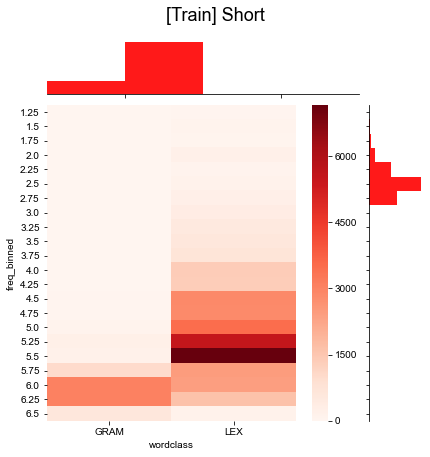

<Figure size 288x360 with 0 Axes>

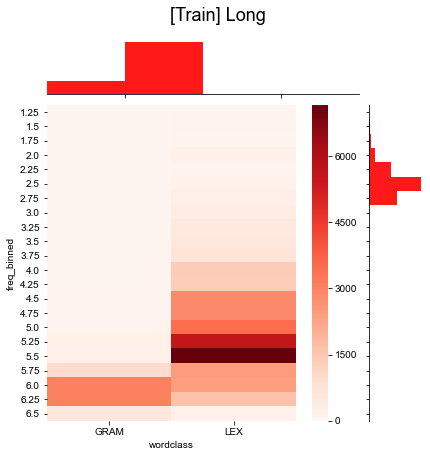

<Figure size 288x360 with 0 Axes>

In [18]:
tmp = train.metadata
tmp['freq_binned'] = tmp['freq'].apply(round_to_quarter)

long_freq = tmp.query(f'len > 4').freq_binned
long_class = tmp.query(f'len > 4').wordclass
long_class = long_class.replace(('LEX', 'GRAM'), (1,0))

short_freq = tmp.query(f'len <= 4').freq_binned
short_class = tmp.query(f'len <= 4').wordclass
short_class = short_class.replace(('LEX', 'GRAM'), (1,0))

long = tmp.query('len > 4')
long = long.query('wordclass == "LEX" or wordclass == "GRAM"')
long_freq_class = long[['wordclass', 'freq_binned']]
long_crosstab = pd.crosstab(long_freq_class.freq_binned, long_freq_class.wordclass)

short = tmp.query('len <= 4')
short = short.query('wordclass == "LEX" or wordclass == "GRAM"')
short_freq_class = short[['wordclass', 'freq_binned']]
short_crosstab = pd.crosstab(short_freq_class.freq_binned, short_freq_class.wordclass)

crosstab = short_crosstab

class jp:
    def __call__(self, x, y):
        ax=plt.gca()
        plt.figure(figsize=(4,5))
        sns.heatmap(crosstab, cmap=train_cmap, ax=ax)

g = sns.JointGrid(x=short_freq_class.freq_binned, y=short_freq_class.wordclass).plot_joint(jp())

_ = g.ax_marg_x.hist(short_class, color=train_clr, alpha=0.9, bins=2)
_ = g.ax_marg_y.hist(short_freq, color=train_clr, alpha=0.9, orientation='horizontal', bins=np.arange(1, 8, 1))
_ = g.ax_marg_y.set_label('Frequency')
_ = g.fig.suptitle(f"[Train] Short ", fontsize=18, y=1.05) 
g.savefig(f'len_train_short.svg', format='svg')

crosstab = long_crosstab

class jp:
    def __call__(self, x, y):
        ax=plt.gca()
        plt.figure(figsize=(4,5))
        sns.heatmap(crosstab, cmap=train_cmap, ax=ax)
        
g = sns.JointGrid(x=long_freq_class.freq_binned, y=long_freq_class.wordclass).plot_joint(jp())

_ = g.ax_marg_x.hist(long_class, color=train_clr, alpha=0.9, bins=2)
_ = g.ax_marg_y.hist(long_freq, color=train_clr, alpha=0.9, orientation='horizontal', bins=np.arange(1, 8, 1))
_ = g.ax_marg_y.set_label('Frequency')
_ = g.fig.suptitle(f"[Train] Long", fontsize=18, y=1.05)
g.savefig(f'len_train_long.svg', format='svg')

# Dev

NameError: name 'dev_cmap' is not defined

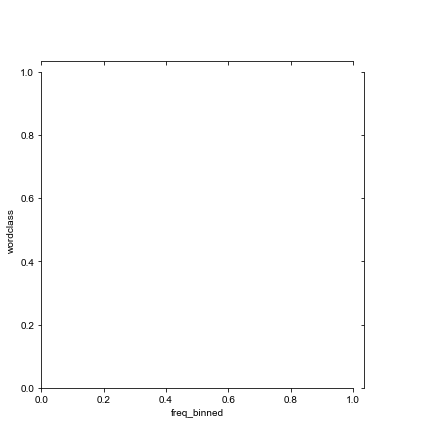

<Figure size 288x360 with 0 Axes>

In [21]:
tmp = dev.metadata
tmp['freq_binned'] = tmp['freq'].apply(round_to_quarter)

long_freq = tmp.query(f'len > 4').freq_binned
long_class = tmp.query(f'len > 4').wordclass
long_class = long_class.replace(('LEX', 'GRAM'), (1,0))

short_freq = tmp.query(f'len <= 4').freq_binned
short_class = tmp.query(f'len <= 4').wordclass
short_class = short_class.replace(('LEX', 'GRAM'), (1,0))

long = tmp.query('len > 4')
long = long.query('wordclass == "LEX" or wordclass == "GRAM"')
long_freq_class = long[['wordclass', 'freq_binned']]
long_crosstab = pd.crosstab(long_freq_class.freq_binned, long_freq_class.wordclass)

short = tmp.query('len <= 4')
short = short.query('wordclass == "LEX" or wordclass == "GRAM"')
short_freq_class = short[['wordclass', 'freq_binned']]
short_crosstab = pd.crosstab(short_freq_class.freq_binned, short_freq_class.wordclass)

crosstab = short_crosstab

class jp:
    def __call__(self, x, y):
        ax=plt.gca()
        plt.figure(figsize=(4,5))
        sns.heatmap(crosstab, cmap=dev_cmap, ax=ax)

g = sns.JointGrid(x=short_freq_class.freq_binned, y=short_freq_class.wordclass).plot_joint(jp())

_ = g.ax_marg_x.hist(short_class, color=dev_clr, alpha=0.9, bins=2)
_ = g.ax_marg_y.hist(short_freq, color=dev_clr, alpha=0.9, orientation='horizontal', bins=np.arange(1, 8, 1))
_ = g.ax_marg_y.set_label('Frequency')
_ = g.fig.suptitle(f"[dev] Short ", fontsize=18, y=1.05) 
g.savefig(f'len_dev_short.svg', format='svg')

crosstab = long_crosstab

class jp:
    def __call__(self, x, y):
        ax=plt.gca()
        plt.figure(figsize=(4,5))
        sns.heatmap(crosstab, cmap=dev_cmap, ax=ax)
        
g = sns.JointGrid(x=long_freq_class.freq_binned, y=long_freq_class.wordclass).plot_joint(jp())

_ = g.ax_marg_x.hist(long_class, color=dev_clr, alpha=0.9, bins=2)
_ = g.ax_marg_y.hist(long_freq, color=dev_clr, alpha=0.9, orientation='horizontal', bins=np.arange(1, 8, 1))
_ = g.ax_marg_y.set_label('Frequency')
_ = g.fig.suptitle(f"[Train] Long", fontsize=18, y=1.05)
g.savefig(f'len_dev_long.svg', format='svg')

## Test

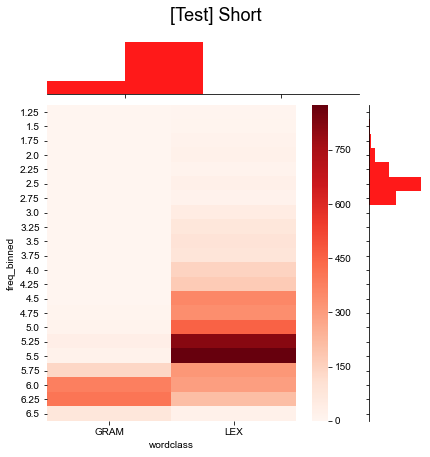

<Figure size 288x360 with 0 Axes>

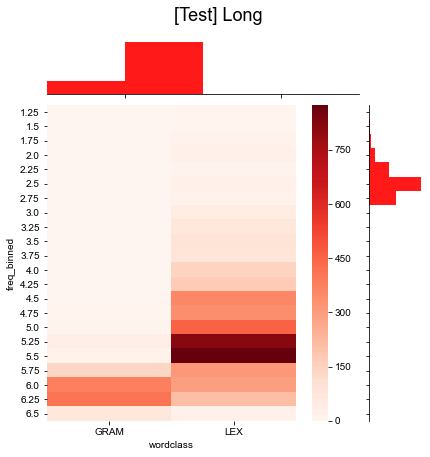

<Figure size 288x360 with 0 Axes>

In [22]:
tmp = test.metadata
tmp['freq_binned'] = tmp['freq'].apply(round_to_quarter)

long_freq = tmp.query(f'len > 4').freq_binned
long_class = tmp.query(f'len > 4').wordclass
long_class = long_class.replace(('LEX', 'GRAM'), (1,0))

short_freq = tmp.query(f'len <= 4').freq_binned
short_class = tmp.query(f'len <= 4').wordclass
short_class = short_class.replace(('LEX', 'GRAM'), (1,0))

long = tmp.query('len > 4')
long = long.query('wordclass == "LEX" or wordclass == "GRAM"')
long_freq_class = long[['wordclass', 'freq_binned']]
long_crosstab = pd.crosstab(long_freq_class.freq_binned, long_freq_class.wordclass)

short = tmp.query('len <= 4')
short = short.query('wordclass == "LEX" or wordclass == "GRAM"')
short_freq_class = short[['wordclass', 'freq_binned']]
short_crosstab = pd.crosstab(short_freq_class.freq_binned, short_freq_class.wordclass)

crosstab = short_crosstab

class jp:
    def __call__(self, x, y):
        ax=plt.gca()
        plt.figure(figsize=(4,5))
        sns.heatmap(crosstab, cmap="Reds", ax=ax)

g = sns.JointGrid(x=short_freq_class.freq_binned, y=short_freq_class.wordclass).plot_joint(jp())

_ = g.ax_marg_x.hist(short_class, color=matched_clr, alpha=0.9, bins=2)
_ = g.ax_marg_y.hist(short_freq, color=matched_clr, alpha=0.9, orientation='horizontal', bins=np.arange(1, 8, 1))
_ = g.ax_marg_y.set_label('Frequency')
_ = g.fig.suptitle(f"[Test] Short ", fontsize=18, y=1.05) 
g.savefig(f'len_test_short.svg', format='svg')

crosstab = long_crosstab

class jp:
    def __call__(self, x, y):
        ax=plt.gca()
        plt.figure(figsize=(4,5))
        sns.heatmap(crosstab, cmap="Reds", ax=ax)
        
g = sns.JointGrid(x=long_freq_class.freq_binned, y=long_freq_class.wordclass).plot_joint(jp())

_ = g.ax_marg_x.hist(long_class, color=matched_clr, alpha=0.9, bins=2)
_ = g.ax_marg_y.hist(long_freq, color=matched_clr, alpha=0.9, orientation='horizontal', bins=np.arange(1, 8, 1))
_ = g.ax_marg_y.set_label('Frequency')
_ = g.fig.suptitle(f"[Test] Long", fontsize=18, y=1.05)
g.savefig(f'len_test_long.svg', format='svg')